In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as P
from importlib import reload
import h5py
import FuncMC2d as F
from FuncMC2d import MESH
import pprint

/home/vipin/FlexibleFilament/MC2d/FuncMC2d.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


In [2]:
from scipy.spatial import SphericalVoronoi
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [3]:
def plot_qhull(sv):
    t_vals = np.linspace(0, 1, 2000)
    fig = P.figure()
    ax = fig.add_subplot(111, projection='3d')
    # plot the unit sphere for reference (optional)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='y', alpha=0.05)
    # plot generator points
    ax.scatter(sv.points[2:, 0], sv.points[2:, 1], sv.points[2:, 2], c='r')
    # plot Voronoi vertices
    #ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')
    #ax.axhline(0.5, ls=':')
    ax.scatter(points[0:2, 0], points[0:2, 1], points[0:2, 2], c='k')
    ax.scatter(sv.points[:, 0],sv.points[:, 1], points[:, 2], c='g')
    for region in sv.simplices:
        n = len(region)
        for i in range(n):
            start = sv.points[region][i]
            end = sv.points[region][(i + 1) % n]
            # print(i)
            # print(start)
            # print(end)
            result = geometric_slerp(start, end, t_vals)
            ax.plot(result[..., 0],
                    result[..., 1],
                    result[..., 2],
                    c='k')
    ax.azim = 10
    ax.elev = 40
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_zticks([])
    #fig.set_size_inches(4, 4)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    P.show()

def SphVoronoi(rr,R=1,lplot=False):
    Np = np.shape(rr)[0]
    xyz = np.zeros([Np,3])
    for ip in range(Np):
        tht = rr[ip,0]
        phi = rr[ip,1]
        x = R*np.sin(tht)*np.cos(phi)
        y = R*np.sin(tht)*np.sin(phi)
        z = R*np.cos(tht)
        xyz[ip] = np.array([x,y,z])
    sv = SphericalVoronoi(xyz,radius=R)
    return sv

In [4]:
P.rc('font',size=22)
P.rc('figure',figsize=(8,6))
P.rc('figure.constrained_layout',use=True)
P.rc('xtick',direction='in')
P.rc('ytick',direction='in')
P.rc('xtick.major',size=8,width=2)
P.rc('xtick.minor',visible=True,size=4,width=1)
P.rc('ytick.major',size=8,width=2)
P.rc('ytick.minor',visible=True,size=4,width=1)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


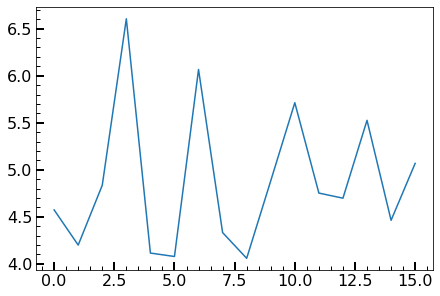

In [5]:
%matplotlib inline
Np=16
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=2*mesh.energy(i)
P.plot(curv)

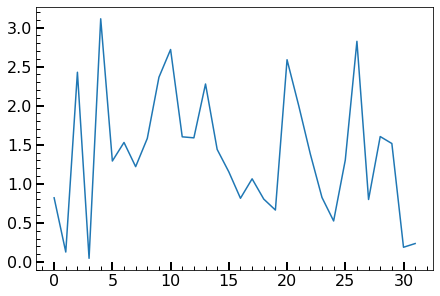

In [16]:
%matplotlib inline
Np=32
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=2*mesh.energy(i)
P.plot(curv)

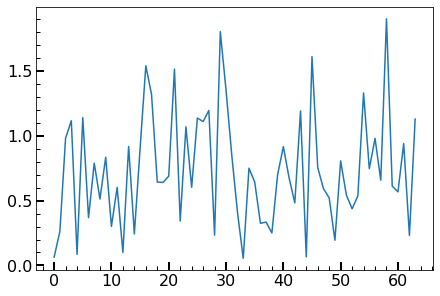

In [18]:
%matplotlib inline
Np=64
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=2*mesh.energy(i)
P.plot(curv)

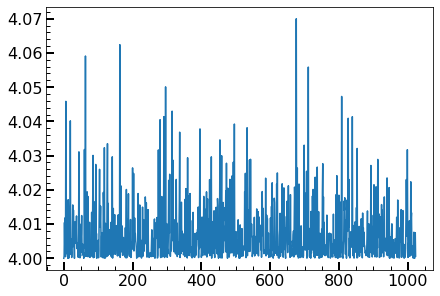

In [6]:
%matplotlib inline
Np=1024
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=2*mesh.energy(i)
P.plot(curv)

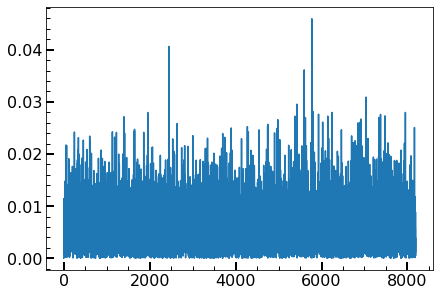

In [27]:
%matplotlib inline
Np=8192
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=2*mesh.energy(i)
P.plot(curv)

In [ ]:
%matplotlib inline
Np=32
rrini = F.rand_sph(Np)
sv = SphVoronoi(rrini,lplot=True)
cmlst,node_neighbour,bond_neighbour=F.neighbours(sv)
mesh=MESH(Np=Np,R=sv.points,BB=1,HH=1,cmlst=cmlst,node_nbr=node_neighbour,bond_nbr=bond_neighbour)
curv=np.zeros(Np)
for i in range(Np):
    curv[i]=mesh.energy(i)
P.plot(curv)

In [46]:
hf=h5py.File("fin_pos.h5","r")
rr=np.array(hf.get('rr'))
hf.close()

In [54]:
print(F.normal(sv,130))
print(sv.points[130])

[ 676  677  678  679 3092 3096 3098]
[ 0.2476978   0.51352543 -0.82154576]
[ 0.20113317  0.63535779 -0.74556417]


In [58]:
print(np.linalg.norm(sv.points[34]))
print(np.linalg.norm(F.normal(sv,34)))

1.0
[ 896  897  925  926 1726 1728]
1.0


In [16]:
sv.points[2]

array([-0.59454901,  0.77539353, -0.2127824 ])

In [18]:
sv.trinrml

array([[ 0.05316685, -0.90871431, -0.41401884],
       [-0.85261315,  0.49981398, -0.15243621],
       [ 0.74687066, -0.0889042 , -0.65899944],
       ...,
       [ 0.04224838, -0.14890741,  0.98794821],
       [-0.04214715, -0.13531963,  0.98990516],
       [ 0.03000382,  0.18485801, -0.98230712]])

<IPython.core.display.Javascript object>


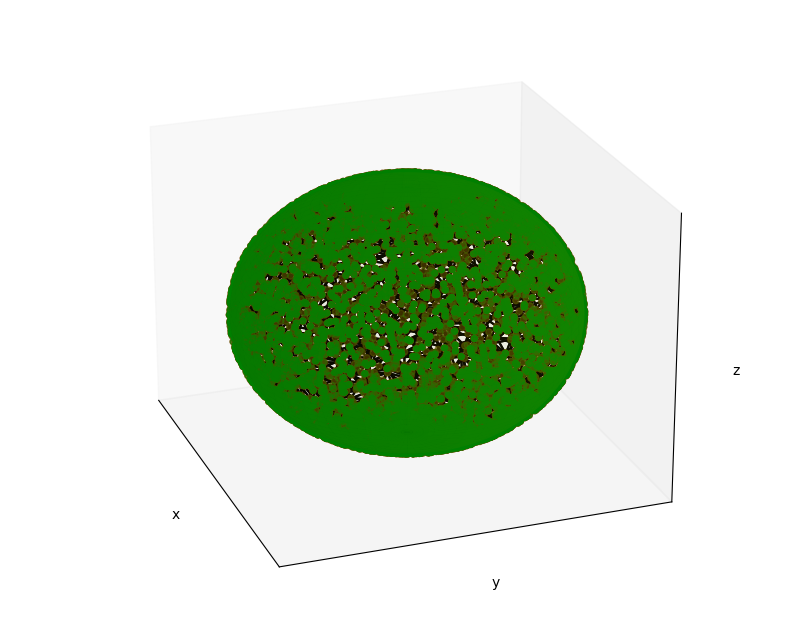

In [59]:
Np=8192
rrini = F.rand_sph(Np)
sv = F.SphVoronoi(rrini)
F.assign_newmems(sv)

In [104]:
err=0
for ip in range(Np):
    err_ip=np.linalg.norm(sv.points[ip]-sv.trinrml[F.get_tri(sv,ip)[0]])
    if err_ip>1:
        err_ip=np.linalg.norm(sv.points[ip]+sv.trinrml[F.get_tri(sv,ip)[0]])
    err=err+err_ip
err/Np

0.028809497080991273

In [114]:
err=0
for ip in range(Np):
    err=err+np.linalg.norm(sv.regions[ip]-sv.tris[sv.cntris[ip]:sv.cntris[ip+1]])
err

0.0

In [176]:
sv.points

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.22464680e-16,  0.00000000e+00, -1.00000000e+00],
       [-3.11442539e-01,  6.80431685e-01,  6.63337219e-01],
       ...,
       [-6.11140047e-01, -7.81329212e-01, -1.26619530e-01],
       [-2.84059181e-02, -6.00141531e-01, -7.99389296e-01],
       [-7.27617785e-02,  3.75907310e-01, -9.23796199e-01]])

In [3]:
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D

In [3]:
np.inner([0,1,2],[3,4,5])

14

In [8]:
(np.cross([0,1,2],[3,4,5]))

array([-3,  6, -3])